# Loading Drug-Target Interaction Datasets

This notebook covers:
- Loading the Davis, KIBA, BindingDB, Metz datasets
- Merging them into a single dataframe
- Filtering based on molecular properties
- Visualizing distributions, overlaps, and statistics
- Saving the merged dataset as a csv file

Unique drug-target interaction pairs: 447.436
- Unique drugs: 162.026
- Unique targets: 2.705
- Ratio observed: 0.105%

In [1]:
import os

# Set the working directory to the root of the project
os.chdir("/home/robsyc/Desktop/thesis/MB-VAE-DTI")

In [2]:
# Import the necessary functions from the loading module
from mb_vae_dti.loading import (
    load_or_create_merged_dataset,
    get_dataset_stats,
    plot_interaction_distribution,
    plot_dataset_statistics,
    plot_dataset_overlap,
    plot_promiscuity_analysis
)

18:38:34 - INFO - Old pandas version detected. Patching DataFrame.map to DataFrame.applymap


## Load, merge and filter the datasets


In [3]:
# Load the merged dataset & apply filters
df = load_or_create_merged_dataset(
    dataset_names=["DAVIS", "KIBA", "BindingDB_Kd", "BindingDB_Ki", "Metz"], 
    # dataset_names=["DAVIS", "KIBA"],
    force_reload=False,
    apply_filters=True,
    verbose=True
)

Loading existing merged dataset from data/processed/merged_BindingDB_Kd_BindingDB_Ki_DAVIS_KIBA_Metz_filtered.csv


In [4]:
# Get statistics of the merged dataset
get_dataset_stats(df)

{'n_interactions': 447436,
 'n_unique_drugs': 162026,
 'n_unique_targets': 2705,
 'avg_drug_smiles_length': 52.552796377582496,
 'avg_target_aa_length': 536.9660152513433,
 'Y_pKd_mean': 5.687022318217582,
 'Y_pKd_std': 1.2010130718830354,
 'Y_pKd_min': 1.999999995657055,
 'Y_pKd_max': 10.0,
 'Y_KIBA_mean': 11.70627341827158,
 'Y_KIBA_std': 0.82103579237372,
 'Y_KIBA_min': 0.0,
 'Y_KIBA_max': 17.196910013,
 'Y_pKi_mean': 6.705943670899221,
 'Y_pKi_std': 1.47320892552395,
 'Y_pKi_min': 1.999999995657055,
 'Y_pKi_max': 10.1,
 'in_DAVIS_count': 23188,
 'in_DAVIS_percentage': 5.182417150162258,
 'in_KIBA_count': 105361,
 'in_KIBA_percentage': 23.547725261266418,
 'in_BindingDB_Kd_count': 37010,
 'in_BindingDB_Kd_percentage': 8.271574035169275,
 'in_BindingDB_Ki_count': 283081,
 'in_BindingDB_Ki_percentage': 63.26737231693471,
 'in_Metz_count': 30689,
 'in_Metz_percentage': 6.858858026622802}

## Visualize the merged dataset

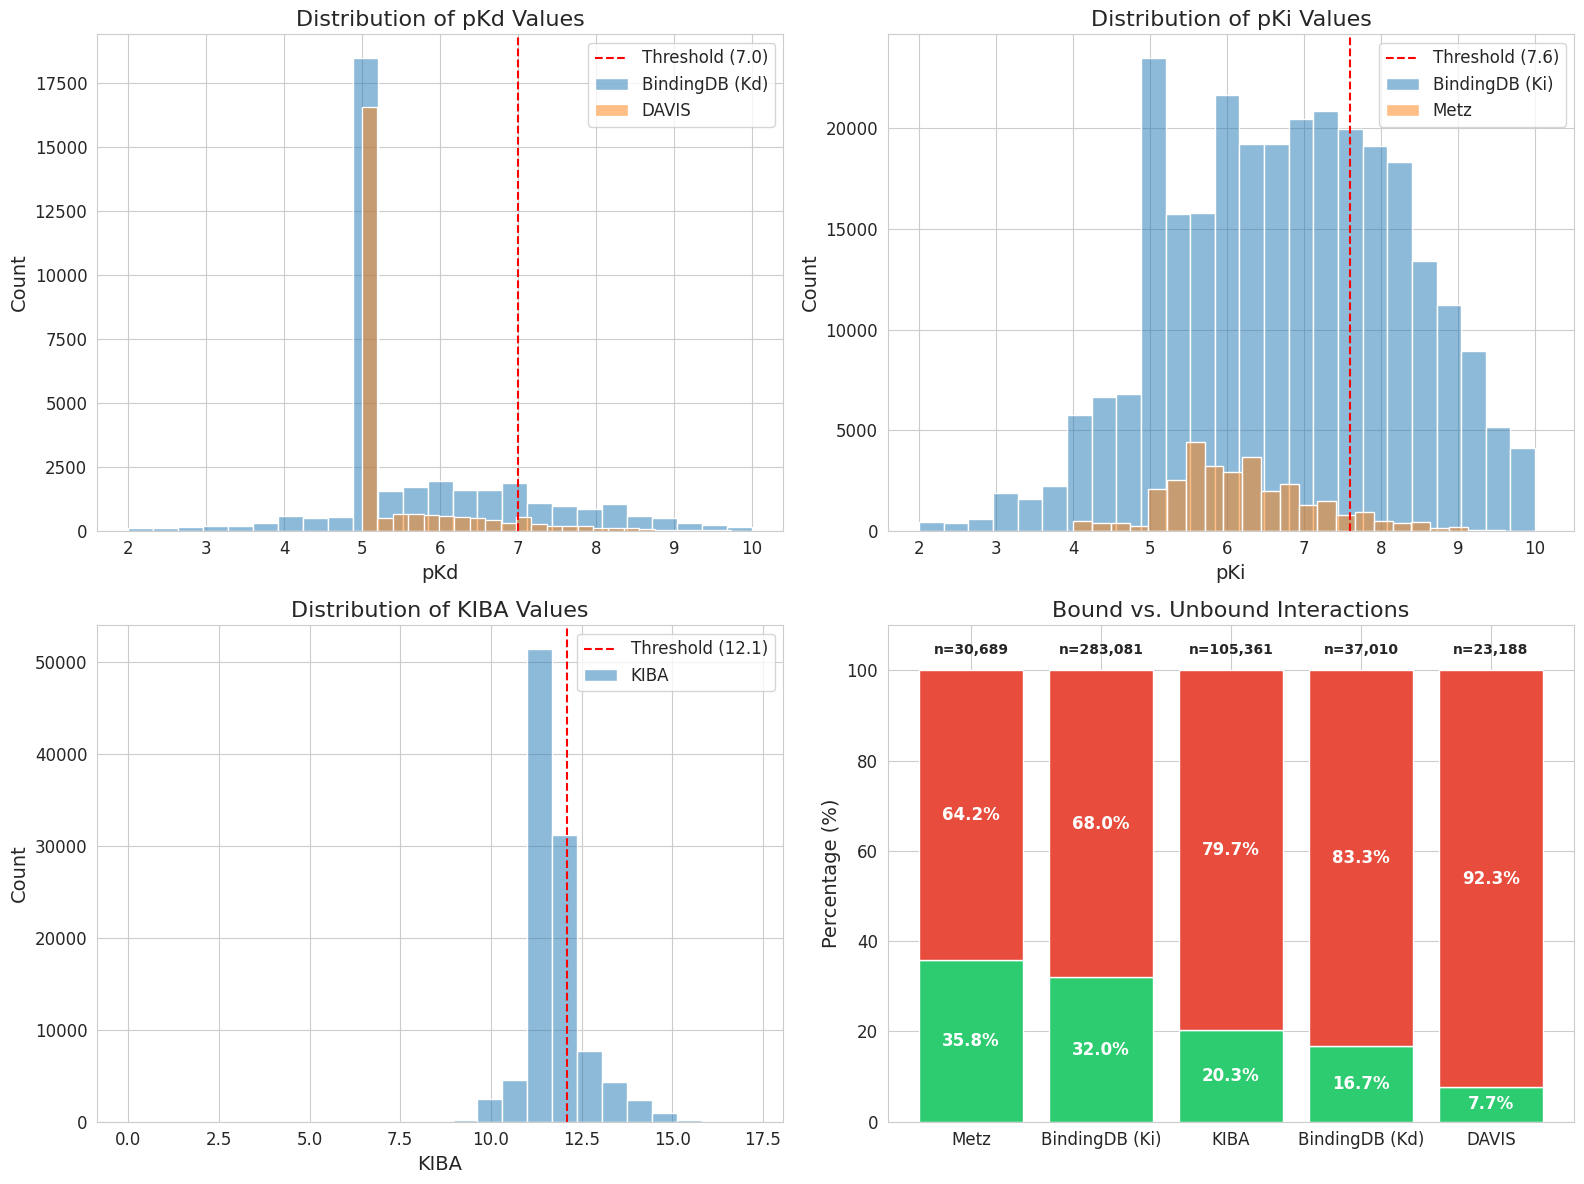

'data/images/interaction_distribution.png'

In [5]:
df_Davis = df[df['in_DAVIS'] == True].drop(columns = ['Y_pKi', 'Y_KIBA'])
df_BDBKd = df[df['in_BindingDB_Kd'] == True].drop(columns = ['Y_pKi', 'Y_KIBA'])
df_BDBKi = df[df['in_BindingDB_Ki'] == True].drop(columns = ['Y_pKd', 'Y_KIBA'])
df_Metz = df[df['in_Metz'] == True].drop(columns = ['Y_pKd', 'Y_KIBA'])
df_KIBA = df[df['in_KIBA'] == True].drop(columns = ['Y_pKd', 'Y_pKi'])

# df_Davis = df[df['in_DAVIS'] == True].drop(columns = ['Y_KIBA'])
# df_KIBA = df[df['in_KIBA'] == True].drop(columns = ['Y_pKd'])

plot_interaction_distribution(
    [df_BDBKd, df_Davis, df_BDBKi, df_Metz, df_KIBA],
    ["BindingDB (Kd)", "DAVIS", "BindingDB (Ki)", "Metz", "KIBA"],
    # [df_Davis, df_KIBA],
    # ["DAVIS", "KIBA"],
    save_path="data/images/interaction_distribution.png"
)

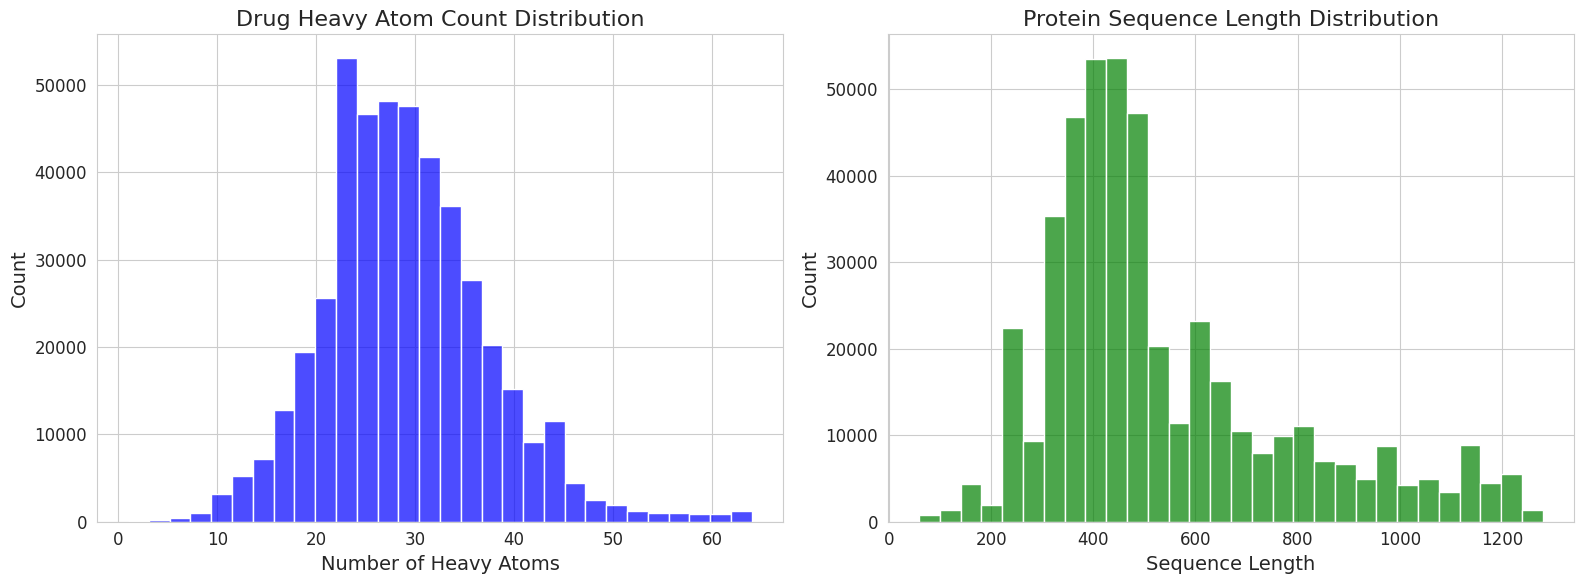

'data/images/dataset_statistics.png'

In [6]:
plot_dataset_statistics(df)

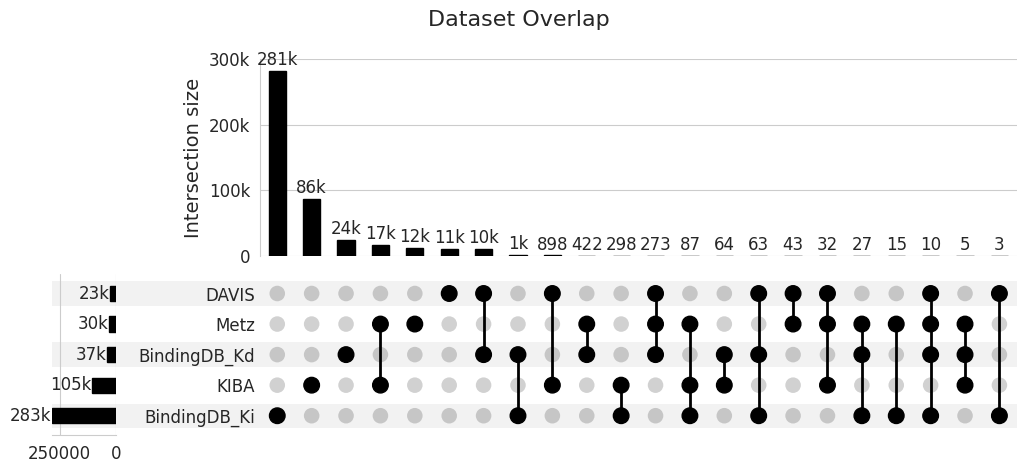

'data/images/dataset_overlap.png'

In [7]:
# This UpSet plot shows
# - the number of unique interactions per dataset
# - the overlap between datasets
plot_dataset_overlap(df)

Drug Interaction Statistics:
Drugs with 0 interactions: 0 (0.0%)
Drugs with 1 interaction: 90,144 (55.6%)
Mean interactions per drug: 2.8
Median interactions per drug: 1.0
Max interactions per drug: 390
Percentiles:
25th: 1, 50th: 1, 75th: 2
90th: 4, 95th: 4, 99th: 20

Target Interaction Statistics:
Targets with 0 interactions: 0 (0.0%)
Targets with 1 interaction: 362 (13.4%)
Mean interactions per target: 165.4
Median interactions per target: 17.0
Max interactions per target: 6,624
Percentiles:
25th: 3, 50th: 17, 75th: 108
90th: 514, 95th: 908, 99th: 1979



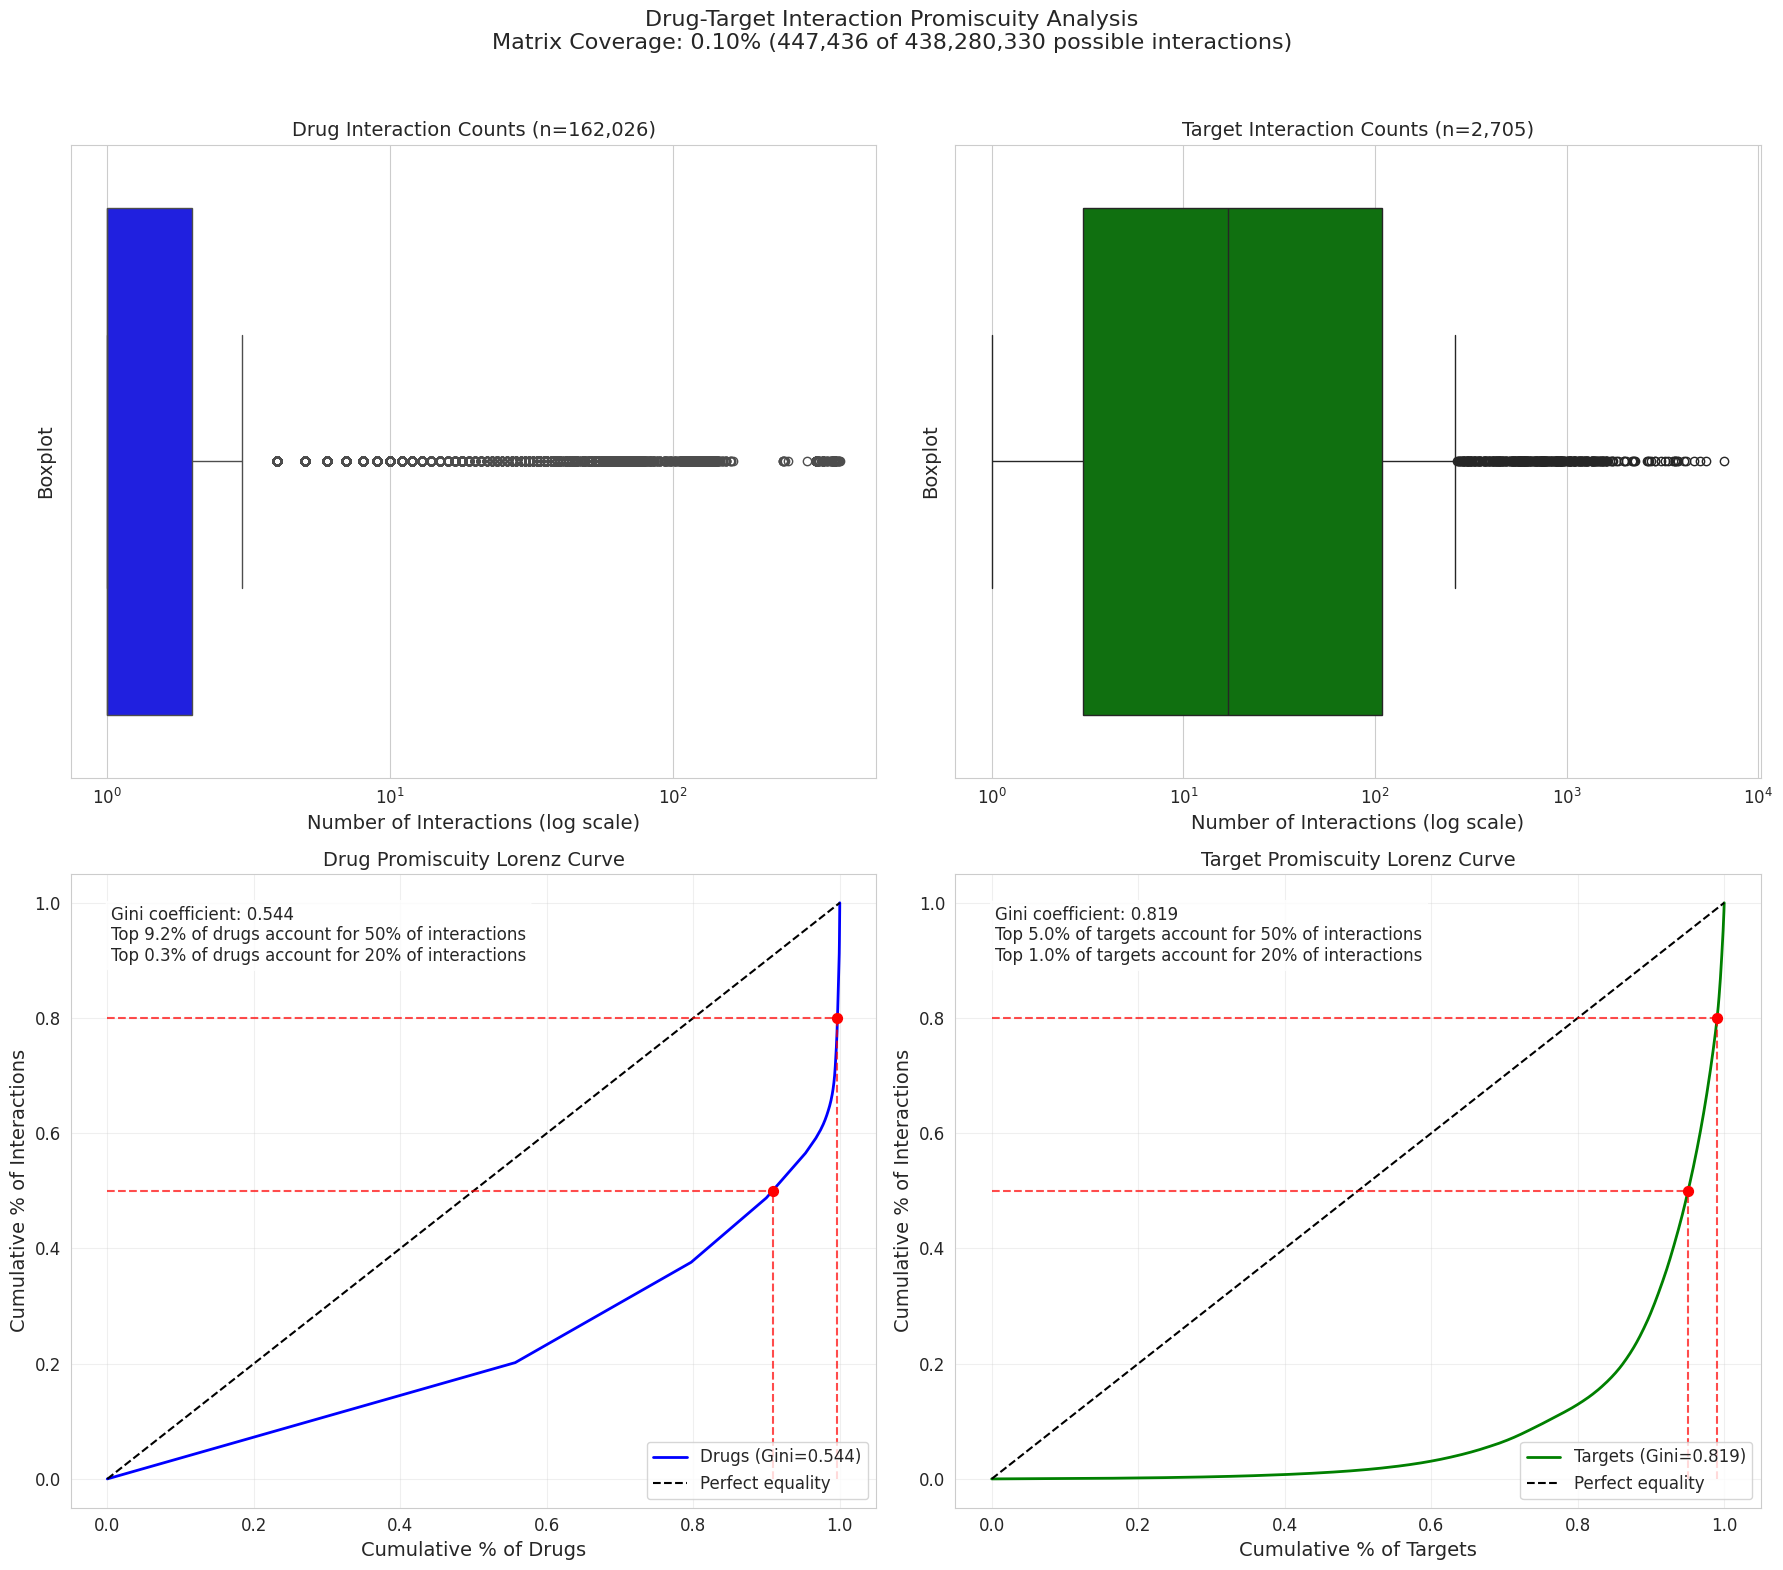

'data/images/promiscuity_analysis.png'

In [8]:
plot_promiscuity_analysis(df)

In [9]:
df

Drug_SMILES   
0       Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...  \
1       Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...   
2       Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...   
3       Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...   
4       Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...   
...                                                   ...   
447431  CN(c1ncccc1CNc1nc(Nc2ccc3c(c2)CC(=O)N3)ncc1C(F...   
447432  CN(c1ncccc1CNc1nc(Nc2ccc3c(c2)CC(=O)N3)ncc1C(F...   
447433  CN(c1ncccc1CNc1nc(Nc2ccc3c(c2)CC(=O)N3)ncc1C(F...   
447434  CN(c1ncccc1CNc1nc(Nc2ccc3c(c2)CC(=O)N3)ncc1C(F...   
447435  CN(c1ncccc1CNc1nc(Nc2ccc3c(c2)CC(=O)N3)ncc1C(F...   

                                                Target_AA      Y     Y_pKd   
0       MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...  False  4.999996  \
1       PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...   True  8.920819   
2       MVLGTVLLPPNSYGRDQDTSLCCLCTEASESALPDLTDHFASCVED...   True  7.995679   
3       MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNED...  False  4.999996   
4       MAESAGASSFFPLVVLLLAGSGGSGPRGVQALLCACTSCLQANYTC...  False  4.999996   
...                                                   ...    ...       ...   
447431  MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...  False       NaN   
447432  MDHPSREKDERQRTTKPMAQRSAHCSRPSGSSSSSGVLMVGPNFRV...  False       NaN   
447433  MQGHFPAERREGRPRRGTRGQQQLLVSPRFLRAWHPPPVSARMPTR...  False       NaN   
447434  MGERSAYQRLAGGEEGPQRLGGGRMQPEEGTGWLLELLSEVQLQQY...  False       NaN   
447435  LGGRSSCEDPGCPRDEERAPRMGCMKSKFLQVGGNTFSKTETSASP...  False       NaN   

        Y_KIBA  Y_pKi  in_DAVIS  in_KIBA  in_BindingDB_Kd  in_BindingDB_Ki   
0          NaN    NaN      True    False             True            False  \
1          NaN    NaN      True    False            False            False   
2          NaN    NaN      True    False            False            False   
3          NaN    NaN      True    False             True            False   
4          NaN    NaN      True    False             True            False   
...        ...    ...       ...      ...              ...              ...   
447431     NaN    6.3     False    False            False            False   
447432     NaN    5.4     False    False            False            False   
447433     NaN    7.0     False    False            False            False   
447434     NaN    5.9     False    False            False            False   
447435     NaN    5.5     False    False            False            False   

        in_Metz  
0         False  
1         False  
2         False  
3         False  
4         False  
...         ...  
447431     True  
447432     True  
447433     True  
447434     True  
447435     True  

[447436 rows x 11 columns]

---

In [10]:
from mb_vae_dti.loading.annotation import generate_unique_ids, annotate_drugs, add_potential_ids

df_drugs, df_targets = generate_unique_ids(df, verbose=True)
df_drugs, df_targets = add_potential_ids(df_drugs, df_targets, verbose=True)
df_targets

Generating unique IDs for drugs and targets...
Generated 162026 unique drug IDs and 2705 unique target IDs
Adding potential IDs from all datasets...
Using cached potential IDs...
Added 159290 potential drug IDs to 158233/162026 drugs
Added 3064 potential target IDs to 2705/2705 targets


Target_AA Target_ID   
0     MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...   T000001  \
1     PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...   T000002   
2     MVLGTVLLPPNSYGRDQDTSLCCLCTEASESALPDLTDHFASCVED...   T000003   
3     MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNED...   T000004   
4     MAESAGASSFFPLVVLLLAGSGGSGPRGVQALLCACTSCLQANYTC...   T000005   
...                                                 ...       ...   
2700  MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADG...   T002701   
2701  MSRESDVEAQQSHGSSACSQPHGSVTQSQGSSSQSQGISSSSTSTM...   T002702   
2702  MGAPACALALCVAVAIVAGASSESLGTEQRVVGRAAEVPGPEPGQQ...   T002703   
2703  MQGHFPAERREGRPRRGTRGQQQLLVSPRFLRAWHPPPVSARMPTR...   T002704   
2704  LGGRSSCEDPGCPRDEERAPRMGCMKSKFLQVGGNTFSKTETSASP...   T002705   

          Potential_ID  
0       {Q2M2I8, AAK1}  
1              {ABL1p}  
2               {ABL2}  
3      {ACVR1, Q04771}  
4     {ACVR1B, P36896}  
...                ...  
2700             {SRC}  
2701           {CHEK2}  
2702           {FGFR3}  
2703            {MATK}  
2704             {HCK}  

[2705 rows x 3 columns]

In [12]:
from mb_vae_dti.loading.drug_annotation import annotate_drug

result = annotate_drug(
    smiles=df_drugs.iloc[0]['Drug_SMILES'],
    potential_ids=df_drugs.iloc[0]['Potential_ID'],
    verbose=True
)
result

DrugAnnotation(smiles='Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc(-c2cccnc2)n1', inchikey='KTUFNOKKBVMGRW-UHFFFAOYSA-N', valid=True)

In [13]:
from mb_vae_dti.loading.target_annotation import annotate_target

result = annotate_target(
    aa_sequence=df_targets.iloc[0]['Target_AA'],
    potential_ids=df_targets.iloc[0]['Potential_ID'],
    verbose=True
)
result

  Found match in UniProt for ID: Q2M2I8
DNA sequence: AGTCTCCGCCCGGCGCTCCCGGGATCAGCTGGCGGGCGGGCGGGAGCCGAGCGCGGCCCCGGCTCTCGCTGCAGCGCCGCCTCTTCTCTGCGTCGCAGGCCGGCCCGGCGGCCGTGACAATGTCGCGGGGCTGGTAGCAGGGCGCCGGCCGCCGAGCCGTCTCAAGTTTAAACTTACACGAATCGCTTTCTGGAGGAGGAGGGGACCCGCTGCGCGATTGACACGCATATTCCTATAGGCATCCTCCCTCAGCCCCCACCCCCACGGCCGGATTCGGGTGGCTCCTCTCCGAGGTGAAATCTGAGAAGAAATCCTTGGATCTCTTTTCTTAAAAAAAAAAAAAAAAAAAAAAAATCTAGAAACCATCGGTATTTTGCTTTGCTGCTCCCTATTCGCAAGATGAAGAAGTTTTTCGACTCCCGGCGAGAGCAGGGCGGCTCTGGCCTGGGCTCCGGCTCCAGCGGAGGAGGGGGCAGCACCTCGGGCCTGGGCAGTGGCTACATCGGAAGAGTCTTCGGCATCGGGCGACAGCAGGTCACAGTGGACGAGGTGTTGGCGGAAGGTGGATTTGCTATTGTATTTCTGGTGAGGACAAGCAATGGGATGAAATGTGCCTTGAAACGCATGTTTGTCAACAATGAGCATGATCTCCAGGTGTGCAAGAGAGAAATCCAGATAATGAGGGATCTTTCAGGGCACAAGAATATTGTGGGTTACATTGATTCTAGTATCAACAACGTGAGTAGCGGTGATGTATGGGAAGTGCTCATTCTGATGGACTTTTGTAGAGGTGGCCAGGTGGTAAACCTGATGAACCAGCGCCTGCAAACAGGCTTTACAGAGAATGAAGTGCTCCAGATATTTTGTGATACCTGTGAAGCTGTTGCCCGCCTGCATCAGTGCAAAACTCCTATTATCCACCGGGACCTGAAGGTTGAAAACATCC

TargetAnnotation(aa_sequence='MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAPVRQQPKVQTTPPPAVQGQKVGSLTPPSSPKTQRAGHRRILSDVTHSAVFGVPASKSTQLLQAAAAEASLNKSKSATTTPSGSPRTSQQNVYNPSEGSTWNPFDDDNFSKLTAEELLNKDFAKLGEGKHPEKLGGSAESLIPGFQSTQGDAFATTSFSAGTAEKRKGGQTVDSGLPLLSVSDPFIPLQVPDAPEKLIEGLKSPDTSLLLPDLLPMTDPFGSTSDAVIEKADVAVESLIPGLEPPVPQRLPSQTESVTSNRTDSLTGEDSLLDCSLLSNPTTDLLEEFAPTAISAPVHKAAEDSNLISGFDVPEGSDKVAEDEFDPIPVLITKNPQGGHSRNSSGSSESSLPNLARSLLLVDQLIDL', dna_se

In [ ]:
df_drugs = annotate_drugs(df_drugs, verbose=True)

Annotating drugs with potential IDs...
Processing 162026 drugs...
Found 158233 drugs with potential IDs
  No matching molecule found from IDs, using SMILES directly: 
  - SMILES: CNc1cncc(-c2c[nH]c(=O)c(NC(=O)c3ccc(N4CCCC4CN4CCCC4)cc3)c2)n1 
  - Potential IDs: {'CHEMBL1765781'}
  No matching molecule found from IDs, using SMILES directly: 
  - SMILES: N#CC(=C1Nc2ccccc2S1)c1ccnc(NCCc2cccnc2)n1.O=C(O)C(F)(F)F.O=C(O)C(F)(F)F 
  - Potential IDs: {'CHEMBL1788116'}
  No matching molecule found from IDs, using SMILES directly: 
  - SMILES: CC1CCC(N2CCC3(CN(C(=O)c4cc5ccc(F)cc5[nH]4)c4ccccc43)C2)CN1 
  - Potential IDs: {'CHEMBL1933552'}
  No matching molecule found from IDs, using SMILES directly: 
  - SMILES: COc1cc(-c2ccc3c(c2)NC(=O)C3=Cc2ccc[nH]2)ccc1O 
  - Potential IDs: {'CHEMBL202930'}
  No matching molecule found from IDs, using SMILES directly: 
  - SMILES: COc1cc2ncnc(Nc3cccc(Cl)c3F)c2cc1CN1CCCCC1C(N)=O 
  - Potential IDs: {'CHEMBL206783'}
  No matching molecule found from IDs, using S

In [14]:
df_drugs

Drug_SMILES  Drug_ID   
0       Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...  D000001  \
1       CNC1CC2OC(C)(C1OC)n1c3ccccc3c3c4c(c5c6ccccc6n2...  D000002   
2          COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1  D000003   
3       CC12OC(CC1(O)CO)n1c3ccccc3c3c4c(c5c6ccccc6n2c5...  D000004   
4                  Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1  D000005   
...                                                   ...      ...   
162021                                Nc1nnc2sc3ccccc3n12  D162022   
162022       CCOC(=O)c1c(NC(=O)C2C(C)(C)C2(C)C)sc2cnccc12  D162023   
162023  CCc1cnn2c(NCc3ccc[n+]([O-])c3)cc(N3CCCC[C@H]3C...  D162024   
162024                               Clc1cc2nn[nH]c2cc1Cl  D162025   
162025              CCCCCCCCCCCCOc1ccc(NC(=N)N)cc1NC(=N)N  D162026   

                      Drug_InChIKey  
0       KTUFNOKKBVMGRW-UHFFFAOYSA-N  
1       HKSZLNNOFSGOKW-UHFFFAOYSA-N  
2       XGALLCVXEZPNRQ-UHFFFAOYSA-N  
3       UIARLYUEJFELEN-UHFFFAOYSA-N  
4       YCOYDOIWSSHVCK-UHFFFAOYSA-N  
...                             ...  
162021  ILYYHBWLPJIMLM-UHFFFAOYSA-N  
162022  UGFZSOOMZPRIIC-UHFFFAOYSA-N  
162023  PIMQWRZWLQKKBJ-SFHVURJKSA-N  
162024  HHEBHJLYNLALHM-UHFFFAOYSA-N  
162025  QMMMGQKKOKYDMN-UHFFFAOYSA-N  

[162026 rows x 3 columns]